In [1]:
%pylab inline
import datetime as dt
from davitpy.models import raydarn
import davitpy
import pandas
import numpy as np
import os

Re = davitpy.utils.Re

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = dt.datetime(2012, 9, 20, 1, 0)
eTime = dt.datetime(2012, 9, 20, 1, 0)
UTstart = sTime.hour + sTime.minute/60.
UTend = eTime.hour + eTime.minute/60.
radar = 'sas'
beam = 3
freq = 14
elev = (8, 45, 0.1)


In [3]:
# Run the ray tracing for the specified period, radar, beam and frequency
# Use 4 threads (MPI) and output everything to /tmp

try:
    os.remove('/tmp/iscat.0.dat')
except:
    pass
try:
    os.remove('/tmp/gscat.0.dat')
except:
    pass

rto = raydarn.RtRun(sTime, eTime, 
    rCode=radar, beam=beam, freq=freq, 
    outDir='/tmp', nprocs=4,elev=elev)

In [4]:
# Read rays into memory
rto.readRays()

In [5]:
#rto.rays.paths[dt.datetime(2012, 9, 20, 7, 0)]

In [6]:
#rto.elev

/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


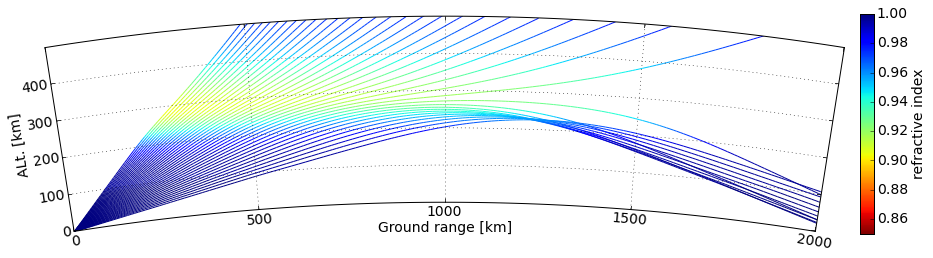

In [7]:
# Plot rays with refractive index color scale
# Plot 1 ray in 10 (1deg increment)
# Plot at start time
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.rays.plot(sTime, step=10, showrefract=True, nr_lim=[.85,1])

ax.grid()

In [8]:
# Read electron densities into memory
rto.readEdens()

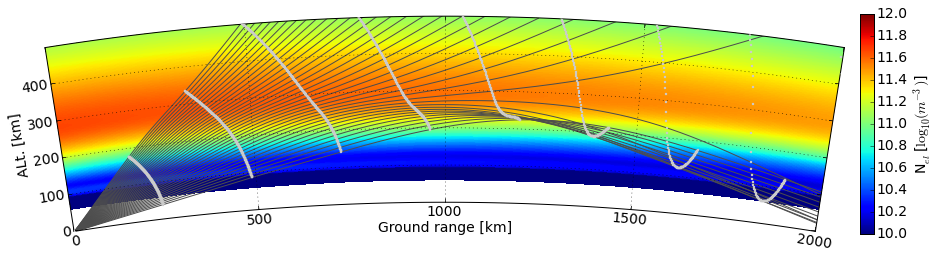

In [9]:
# Plot rays and electron densities together
# Plot at start time
# Plot range markers (every 250 km)
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.ionos.plot(sTime)
ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, ax=ax, aax=aax)
rto.rays.showRange()

ax.grid()

In [10]:
# Read ionospheric and ground scatter into memory
rto.readScatter()

In [11]:
# rto.rays.writeToAscii('/home/davitpy/Desktop/rays.txt')

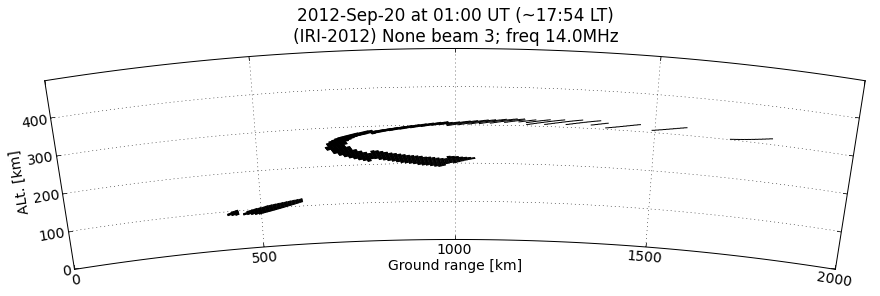

In [12]:
# Plot ionospheric and ground scatter together
# Plot at start time
# Plot relative strength of ionospheric scatter
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cax = rto.scatter.plot(sTime, title=True, weighted=False)

ax.grid()

In [13]:
#rto.scatter.isc

In [14]:
kt = rto.scatter.isc.keys()[0]
kb = rto.scatter.isc[kt].keys()[0]


In [15]:
dict_list = []
for kt in rto.scatter.isc.keys():
    for kb in rto.scatter.isc[kt].keys():
        elv_dict = rto.scatter.isc[kt][kb]
        for key,value in elv_dict.items():
            for ii in range(value['nstp']):
                tmp_dict = {'time':kt,'beam':kb,'elv_init':key,'radar':radar}
                for param,param_val in value.items():
                    if param == 'nstp': continue
                    tmp_dict[param] = param_val[ii]
                dict_list.append(tmp_dict)

In [16]:
df = pandas.DataFrame(dict_list)

In [17]:
#This code creates an additional dictionary list and DataFrame that identifies the elevation
#angles of all rays that are reflected by the ionosphere and backscattered by the ground.
#Knowledge of the highest elevation angle ground-backscattered ray greatly simplifies the 
#estimation of the refractive indices and great-circle distances to the scatter volumes.
#Currently the DataFrame does not include the great circle distance of the ground scatter.
#This will be an important addition and should be relatively easy to do, especially if the
# code is extended to estimate 1 1/2 hop scatter modes.

dict_list_gs = []
for kt in rto.scatter.gsc.keys():
    for kb in rto.scatter.gsc[kt].keys():
        elv_dict_gs = rto.scatter.gsc[kt][kb]
        for key,value in elv_dict_gs.items():
            tmp_dict_gs = {'time':kt, 'beam':kb, 'elv_init':key, 'radar':radar}
            dict_list_gs.append(tmp_dict_gs)
                             

In [18]:
dgs = pandas.DataFrame(dict_list_gs)

In [19]:
#The two-parameter analysis runs from the highest elevation-angle ray that detects scatter to the
#lowest. To accomplish this, both the df and dgs DataFrames need to be re-sorted and reindexed to run
#from high to low elevation angles. The re-sorted rays can be slassified into three groups.
#Group 1:Rays that refract sufficiently to be backscattered and then quickly penetrate the ionosphere.
#Group 2: Rays that backscatter below the peak of the F-region and again above the peak of the F-layer
#after which they penetrate the ionosphere. Group 3: Rays that backscatter below the peak of the F-layer
#and then are reflected by the ionosphere. Each group is processed by its associated phase of the
#analysis.

dgs.sort('elv_init', ascending=False, inplace=True)

In [20]:
dgs.reset_index(drop=True, inplace=True)

In [21]:
dgs.head(64)

,beam,elv_init,radar,time
0,3,18.1,sas,2012-09-20 01:00:00
1,3,18.0,sas,2012-09-20 01:00:00
2,3,17.9,sas,2012-09-20 01:00:00
3,3,17.8,sas,2012-09-20 01:00:00
4,3,17.7,sas,2012-09-20 01:00:00
5,3,17.6,sas,2012-09-20 01:00:00
6,3,17.5,sas,2012-09-20 01:00:00
7,3,17.4,sas,2012-09-20 01:00:00
8,3,17.3,sas,2012-09-20 01:00:00
9,3,17.2,sas,2012-09-20 01:00:00


In [22]:
del df['w']

In [23]:
#The peak electron density of the F-region ionosphere undergoes significant variation 
#in the course of a day. This variation requires a minimum of two operating 
#frequencies: one for daytime operation and one for nighttime operation. A third
#intermediate frequency might also be desirable for the dawn and dusk transitions. One
#can assure similar propagagion conditions, if the ground scatter footprint of a 
# signal at a specific initial elevation angle remains at  a similiar great circle
#distance. The equations below are used to identify the local time of the UT time that
#is being processed. The minimum ionospheric electron density occurs 1-2 hours before 
#local dawn, while the maximum density occurs a few hours afer local noon.

hysteresis = 2.
df['Loc_time'] = (df['time'][0].hour + df['time'][0].minute/60. + df['lon']/15. - hysteresis) % 24.

In [24]:
df.describe()

,beam,elv_init,gran,h,lat,lon,nr,r,rel,th,Loc_time
count,1434,1434.000000,1434.000000,1434,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,3,15.108647,877301.255230,10000,59.323473,-104.603086,0.949674,6596800.223849,10.018502,0.127187,16.026461
std,0,4.872442,244736.361931,0,1.902850,0.581390,0.028219,64865.163790,1.536445,0.033609,0.038759
min,3,8.000000,425000.000000,10000,55.777065,-105.609505,0.913672,6457439.000000,4.640299,0.064638,15.959366
25%,3,9.825000,775000.000000,10000,58.387177,-104.891163,0.921922,6578432.375000,9.108961,0.110569,16.007256
50%,3,15.400000,855000.000000,10000,59.082933,-104.690128,0.949358,6599190.750000,9.946294,0.122928,16.020658
75%,3,19.800000,975000.000000,10000,60.259550,-104.341026,0.970228,6647831.500000,10.750784,0.143820,16.043932
max,3,22.000000,1995000.000000,10000,67.982475,-101.670166,0.999136,6691394.500000,13.954424,0.280329,16.221989


In [25]:
df['lgc_rt']=df['th'] * Re

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 14 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 168.0+ KB


In [27]:
df.head(64)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt
0,3,8.5,485000,10000,56.324745,-105.462639,0.999005,6458195.5,sas,12.491806,0.074327,2012-09-20 01:00:00,15.969157,473.536459
1,3,8.5,495000,10000,56.410179,-105.439560,0.998227,6460090.0,sas,12.380327,0.075837,2012-09-20 01:00:00,15.970696,483.154497
2,3,8.5,505000,10000,56.495548,-105.416435,0.997411,6461908.5,sas,12.242514,0.077345,2012-09-20 01:00:00,15.972238,492.766363
3,3,8.5,515000,10000,56.580872,-105.393280,0.996727,6463771.0,sas,12.128212,0.078853,2012-09-20 01:00:00,15.973781,502.371774
4,3,8.5,525000,10000,56.666145,-105.370087,0.996254,6465736.0,sas,12.063756,0.080360,2012-09-20 01:00:00,15.975328,511.970493
5,3,8.5,535000,10000,56.751373,-105.346848,0.995985,6467827.0,sas,12.060826,0.081865,2012-09-20 01:00:00,15.976877,521.562565
6,3,8.5,545000,10000,56.836540,-105.323570,0.995861,6470008.5,sas,12.098912,0.083370,2012-09-20 01:00:00,15.978429,531.148087
7,3,8.5,555000,10000,56.921661,-105.300255,0.995821,6472265.0,sas,12.166307,0.084873,2012-09-20 01:00:00,15.979983,540.727201
8,3,8.5,565000,10000,57.006725,-105.276901,0.995817,6474564.5,sas,12.245445,0.086376,2012-09-20 01:00:00,15.981540,550.300002
9,3,8.5,575000,10000,57.091740,-105.253517,0.995824,6476897.5,sas,12.330472,0.087877,2012-09-20 01:00:00,15.983099,559.866537


In [28]:
df['height']=df['r']/1000.-Re

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 15 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
height      1434 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 179.2+ KB


In [30]:
df['h_2p'] = np.sqrt(Re**2 + (df['gran']*1e-3)**2 + 2*(df['gran']*1e-3)*Re*np.sin(df['elv_init']*np.pi/180.)) - Re
df['h_2p'].describe()

count    1434.000000
mean      291.577634
std       136.113890
min        89.017760
25%       233.086441
50%       261.618323
75%       350.952697
max       878.237566
Name: h_2p, dtype: float64

In [31]:
#The minimum height of the peak of the F-region electron density profile occurs a few hours
#after local noon and the minimum height occurs a few hours before dawn. EUV photons emitted
#by the sun is the principal process for creation of the ionosphere and 3-body recombination
#is the principal process for its decay. THe third body in the reaction is a neutral atom. Since
#the neutral density of the upper atmosphere decreases with altitude, the ionosphere after sunset
#decays from the bottom up. This equation is used in the 2-parameter analysis to mirror the
#in height of the ionosphere over a day. The changes in virtual height affect the Earth-centered
#included by the group path and the initial elevation angle and ultimately impact the great-circle
#distance of the scattering volume. The expression below optimmizes the diurnal variation of the
#virtual height and great-circle distance.

tmp = []
for index,row in df.iterrows():
    h_2p_max = 600. + 100*np.cos(row['Loc_time']*np.pi/12.)  #use 2000 for pure 2p-method, 550 for modified 2p-method
    if row['h_2p'] > h_2p_max:
        row['h_2p'] = h_2p_max
    tmp.append(row)    
df = pandas.DataFrame(tmp)
del tmp
df['h_2p'].describe()


count    1434.000000
mean      286.067305
std       120.500119
min        89.017760
25%       233.086441
50%       261.618323
75%       350.952697
max       555.114624
Name: h_2p, dtype: float64

In [32]:
df['th_2p']  = np.arcsin((df['gran']*1e-3)*np.cos(df['elv_init']*np.pi/180.) / (Re + df['h_2p']))
df['lgc_2p'] = df['th_2p'] * Re
print 

In [33]:
df['nr_2p'] = np.zeros_like(df['th_2p'], dtype=np.float)
size = df['th_2p'].size
df['phase'] = np.zeros_like(df['beam'], dtype = np.int64)

In [34]:
#Calculate 2p lat/lon for each step.
df['lat_2p'], df['lon_2p'] = davitpy.utils.greatCircleMove(rto.site.geolat, rto.site.geolon, df['lgc_2p'], rto.azim[0])

#Calculate bearing of each step
lats_lons = zip(np.array(df['lat_2p']), np.array(df['lon_2p']))
bearing = []
for lat, lon in lats_lons:
    bearing.append((davitpy.utils.greatCircleAzm(lat,lon,rto.site.geolat,rto.site.geolon) + 180.) % 360.)

df['bearing'] = bearing

In [35]:
# INPUTS
itype = 2 # 1 for Geodetic coordinates (Spheroid) OR 2 for Geocentric (Sphere)
decimal_yr = davitpy.utils.dateToDecYear(sTime) # decimal year
igrf_alt = 350. + Re # altitude
stp = 5.
xlti, xltf, xltd = -90.,90.,stp # latitude start, stop, step
xlni, xlnf, xlnd = -180.,180.,stp # longitude start, stop, step
ifl = 0 # Main field
# Call fortran subroutine
#lat,lon,d,s,h,x,y,z,f = davitpy.models.igrf.igrf11(itype,decimal_yr,igrf_alt,ifl,xlti,xltf,xltd,xlni,xlnf,xlnd)

lats_lons = zip(np.array(df['lat_2p']), np.array(df['lon_2p']))
mag_field = []
for lat, lon in lats_lons:
    result =  davitpy.models.igrf.igrf11syn(0,decimal_yr,itype,igrf_alt,90.-lat,lon)
    mag_field.append(result)
df['bx'], df['by'], df['bz'], df['B'] = zip(*mag_field)

# "b_along_ray_path"
df['b_kx'] = np.cos(np.radians(df['bearing']))*df['bx'] + np.sin(np.radians(df['bearing']))*df['by']

#for b_comp in ['bx','by','bz','b_kx']:
#    df[b_comp] = df[b_comp]/df['B']
df['b_kx'] = df['b_kx']/df['B']
df['b_kz'] = df['bz']/df['B']
df['dip'] = np.degrees(np.arctan2(df['b_kz'],df['b_kx']))

df['beta'] = 90. - np.degrees(df['th_2p']) - df['elv_init']
df['rot'] = df['dip'] - df['beta']

In [36]:
np.cos(np.radians(18.7))

0.94721027774602884

In [37]:
mag_list = ['lgc_2p','bx','by','bz','B','b_kx','b_kz','dip','beta','rot']
mag_list = ['lgc_2p','elv_init','nr','b_kx','b_kz','dip','beta','rot']

df[mag_list]


,lgc_2p,elv_init,nr,b_kx,b_kz,dip,beta,rot
0,473.461860,8.5,0.999005,0.200565,0.979680,78.430014,77.242055,1.187959
1,483.076540,8.5,0.998227,0.199621,0.979873,78.485226,77.155588,1.329638
2,492.684609,8.5,0.997411,0.198679,0.980065,78.540306,77.069181,1.471125
3,502.286028,8.5,0.996727,0.197739,0.980255,78.595253,76.982833,1.612420
4,511.880762,8.5,0.996254,0.196801,0.980444,78.650067,76.896546,1.753521
5,521.468773,8.5,0.995985,0.195865,0.980631,78.704747,76.810319,1.894429
6,531.050026,8.5,0.995861,0.194931,0.980817,78.759294,76.724152,2.035142
7,540.624485,8.5,0.995821,0.194000,0.981002,78.813707,76.638047,2.175660
8,550.192112,8.5,0.995817,0.193070,0.981185,78.867986,76.552003,2.315982
9,559.752873,8.5,0.995824,0.192143,0.981367,78.922130,76.466021,2.456109


In [38]:
result

(7777.499092980241, 1157.5797893313436, 49239.41335286315, 49863.30625263526)

In [39]:
df.sort(['elv_init', 'gran'], ascending=[False, True], inplace=True)
print size

1434


In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 32 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
height      1434 non-null float64
h_2p        1434 non-null float64
th_2p       1434 non-null float64
lgc_2p      1434 non-null float64
nr_2p       1434 non-null float64
phase       1434 non-null int64
lat_2p      1434 non-null float64
lon_2p      1434 non-null float64
bearing     1434 non-null float64
bx          1434 non-null float64
by          1434 non-null float64
bz          1434 non-null float64
B      

In [42]:
see = ['elv_init','gran','height','h_2p', 'th', 'th_2p']
df[see].tail(80)

,elv_init,gran,height,h_2p,th,th_2p
1354,8.3,565000,101.3440,105.736794,0.086446,0.086429
1355,8.3,575000,103.6195,108.036453,0.087949,0.087931
1356,8.3,585000,105.9235,110.350726,0.089451,0.089433
1357,8.3,595000,108.2835,112.679595,0.090952,0.090933
1358,8.3,605000,110.7320,115.023047,0.092452,0.092432
1359,8.3,615000,113.2370,117.381064,0.093952,0.093930
1360,8.3,985000,192.9775,214.716507,0.148721,0.148545
1361,8.3,995000,195.1420,217.615619,0.150184,0.149998
1362,8.3,1005000,197.4195,220.528627,0.151647,0.151450
1363,8.3,1015000,199.7920,223.455513,0.153109,0.152900


In [43]:
df.head(64)


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,bearing,bx,by,bz,B,b_kx,b_kz,dip,beta,rot
0,3,22.0,795000,10000,58.395744,-104.888824,0.914243,6643603.5,sas,10.946948,...,9.984609,8759.502538,1410.340580,48877.294237,49676.028799,0.178584,0.983921,79.712648,61.692637,18.020011
1,3,22.0,805000,10000,58.472118,-104.866989,0.913949,6645523.0,sas,10.876927,...,10.005824,8722.858867,1401.202031,48892.657218,49684.439856,0.177795,0.984064,79.758614,61.617506,18.141108
2,3,22.0,815000,10000,58.548454,-104.845116,0.913759,6647430.0,sas,10.836088,...,10.027116,8686.298588,1392.062727,48907.841746,49692.721862,0.177008,0.984205,79.804440,61.542482,18.261958
3,3,22.0,825000,10000,58.624775,-104.823204,0.913672,6649321.0,sas,10.824423,...,10.048484,8649.822163,1382.922809,48922.848699,49700.875482,0.176223,0.984346,79.850124,61.467564,18.382560
4,3,22.0,835000,10000,58.701069,-104.801239,0.913689,6651198.0,sas,10.841923,...,10.069929,8613.430044,1373.782419,48937.678954,49708.901382,0.175440,0.984485,79.895667,61.392752,18.502915
5,3,22.0,845000,10000,58.777332,-104.779243,0.913810,6653070.0,sas,10.888596,...,10.091450,8577.122682,1364.641697,48952.333394,49716.800231,0.174660,0.984624,79.941069,61.318046,18.623023
6,3,21.9,785000,10000,58.324375,-104.909210,0.914940,6640890.5,sas,10.944031,...,9.965019,8793.528403,1418.807017,48862.899784,49668.119860,0.179318,0.983788,79.669932,61.862344,17.807588
7,3,21.9,795000,10000,58.400845,-104.887390,0.914500,6642826.0,sas,10.830256,...,9.986189,8756.764931,1409.658595,48878.446967,49676.660992,0.178525,0.983932,79.716083,61.787026,17.929057
8,3,21.9,805000,10000,58.477276,-104.865532,0.914164,6644754.5,sas,10.745682,...,10.007436,8720.084398,1400.509229,48893.814559,49685.072206,0.177735,0.984075,79.762093,61.711815,18.050278
9,3,21.9,815000,10000,58.553684,-104.843636,0.913931,6646663.0,sas,10.690284,...,10.028758,8683.487274,1391.359062,48909.003434,49693.354165,0.176947,0.984216,79.807962,61.636710,18.171252


In [44]:
# Determine the "phase" of the analysis.
#   Phase 1: Radar rays with same initial elevation angle are typically spaced approx. 10 km apart
#            but always less than 50 km apart
#   Phase 2: Radar rays with same initial elevation angle are spaced greater than 50 km apart
#   Phase 3: Radar rays are ground scatter rays.

phase_nr  = np.zeros([len(df)],dtype=np.int)
gran_diff = df.gran.diff()
first     = (np.where(gran_diff > 50000)[0]).min()
phase_nr[:first] = 1

# Make all entries of the elevation angle where the transition occurs a phase 2.
tmp_elv_init = df['elv_init'].loc[first]
tf = np.array( df['elv_init'] == tmp_elv_init)
phase_nr[tf] = 2

max_elv_init_gs = dgs['elv_init'][0]
tf = np.array( df['elv_init'] < max_elv_init_gs )

phase_nr[tf] = 3
phase_nr[phase_nr == 0] = 2
df['phase'] = phase_nr

In [45]:
def calc_nr(elv_init,th_2p,inclination_init):
    nr_2p = np.sin((90-elv_init-th_2p*180./np.pi)*np.pi/180.)/inclination_init
    return nr_2p

In [46]:
nr_2p = np.zeros([len(df)],dtype=np.float)
#nr_2p[0] = calc_nr(df['elv_init'][0], df['th_2p'][0])
for index, row in df.iterrows():
    inclination_init = np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    if index == 0:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'],inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] <  last_elv and row['phase'] == 1:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 1:
        nr_2p[index] = last_nr_2p #*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['elv_init'] <  last_elv and row['phase'] == 2:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 2:
        nr_2p[index] = last_nr_2p*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['phase'] == 3:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)

    last_elv   = row['elv_init']
    #print index,row['elv_init'], nr_2p[index]
    
df['nr_2p'] = nr_2p

In [47]:
nr_offset = df['nr'].mean() - df['nr_2p'].mean()
print nr_offset
df['nr_2p'] = df['nr_2p'] + nr_offset

0.0061966475116


In [48]:
df.head(64)
#The table below displays the organization of the re-sorted and reindexed df DataFrame

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,bearing,bx,by,bz,B,b_kx,b_kz,dip,beta,rot
0,3,22.0,795000,10000,58.395744,-104.888824,0.914243,6643603.5,sas,10.946948,...,9.984609,8759.502538,1410.340580,48877.294237,49676.028799,0.178584,0.983921,79.712648,61.692637,18.020011
1,3,22.0,805000,10000,58.472118,-104.866989,0.913949,6645523.0,sas,10.876927,...,10.005824,8722.858867,1401.202031,48892.657218,49684.439856,0.177795,0.984064,79.758614,61.617506,18.141108
2,3,22.0,815000,10000,58.548454,-104.845116,0.913759,6647430.0,sas,10.836088,...,10.027116,8686.298588,1392.062727,48907.841746,49692.721862,0.177008,0.984205,79.804440,61.542482,18.261958
3,3,22.0,825000,10000,58.624775,-104.823204,0.913672,6649321.0,sas,10.824423,...,10.048484,8649.822163,1382.922809,48922.848699,49700.875482,0.176223,0.984346,79.850124,61.467564,18.382560
4,3,22.0,835000,10000,58.701069,-104.801239,0.913689,6651198.0,sas,10.841923,...,10.069929,8613.430044,1373.782419,48937.678954,49708.901382,0.175440,0.984485,79.895667,61.392752,18.502915
5,3,22.0,845000,10000,58.777332,-104.779243,0.913810,6653070.0,sas,10.888596,...,10.091450,8577.122682,1364.641697,48952.333394,49716.800231,0.174660,0.984624,79.941069,61.318046,18.623023
6,3,21.9,785000,10000,58.324375,-104.909210,0.914940,6640890.5,sas,10.944031,...,9.965019,8793.528403,1418.807017,48862.899784,49668.119860,0.179318,0.983788,79.669932,61.862344,17.807588
7,3,21.9,795000,10000,58.400845,-104.887390,0.914500,6642826.0,sas,10.830256,...,9.986189,8756.764931,1409.658595,48878.446967,49676.660992,0.178525,0.983932,79.716083,61.787026,17.929057
8,3,21.9,805000,10000,58.477276,-104.865532,0.914164,6644754.5,sas,10.745682,...,10.007436,8720.084398,1400.509229,48893.814559,49685.072206,0.177735,0.984075,79.762093,61.711815,18.050278
9,3,21.9,815000,10000,58.553684,-104.843636,0.913931,6646663.0,sas,10.690284,...,10.028758,8683.487274,1391.359062,48909.003434,49693.354165,0.176947,0.984216,79.807962,61.636710,18.171252


In [49]:
df['th_2p'].describe()

count    1434.000000
mean        0.126480
std         0.032819
min         0.064628
25%         0.110188
50%         0.122441
75%         0.143275
max         0.277002
Name: th_2p, dtype: float64

In [50]:
df['lgc_rt'].describe()

count    1434.000000
mean      810.306605
std       214.119910
min       411.811427
25%       704.436050
50%       783.177190
75%       916.278115
max      1785.975040
Name: lgc_rt, dtype: float64

In [51]:
df['lgc_2p'].describe()

count    1434.000000
mean      805.801839
std       209.089278
min       411.743923
25%       702.009303
50%       780.073884
75%       912.804959
max      1764.777187
Name: lgc_2p, dtype: float64

In [52]:
df['nr_2p'].describe()

count    1434.000000
mean        0.949674
std         0.030045
min         0.902918
25%         0.923364
50%         0.948933
75%         0.971517
max         1.004743
Name: nr_2p, dtype: float64

In [53]:
df['nr'].describe()

count    1434.000000
mean        0.949674
std         0.028219
min         0.913672
25%         0.921922
50%         0.949358
75%         0.970228
max         0.999136
Name: nr, dtype: float64

In [54]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR STANDARD METHOD

#df['hv_sm'] = np.zeros_like(df['gran'], dtype = np.float)
#hve = 115.
#hvf = 350.
#size=df['gran'].size
#print size
#for index in range(0, size-1):
    #gran_km = (df['gran'][index])/1000.
    #if gran_km < 600.:
        #df['hv_sm'][index] = hve
    #elif 800. > gran_km >= 600.:
        #df['hv_sm'][index] = (gran_km-600.)*(hvf-hve)/200. + hve
    #else:
        #df['hv_sm'][index] = hvf
#df['th_sm'] =np.arccos((Re**2.+(Re+ df['hv_sm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_sm'])))
#df['lgc_sm'] = df['th_sm'] * Re

In [55]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR CHISHAM METHOD

#df['hv_cm'] = np.zeros_like(df['gran'], dtype = np.float)
#size1 = df['gran'].size
#print size1
#for index1 in range(0, size1-1):
    #gran_km1 = (df['gran'][index1])/1000.
    #if gran_km1 < 790.:
        #df['hv_cm'][index1] = 108.974 + 0.0191721*gran_km1 + 6.6828*1e-5*gran_km1*gran_km1
    #else:
        #df['hv_cm'][index1] = 384.416 - 0.17864*gran_km1 + 1.81405*1e-4*gran_km1*gran_km1
        
#df['th_cm'] =np.arccos((Re**2.+(Re+ df['hv_cm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_cm'])))
#df['lgc_cm'] = df['th_cm'] * Re

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 32 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
height      1434 non-null float64
h_2p        1434 non-null float64
th_2p       1434 non-null float64
lgc_2p      1434 non-null float64
nr_2p       1434 non-null float64
phase       1434 non-null int64
lat_2p      1434 non-null float64
lon_2p      1434 non-null float64
bearing     1434 non-null float64
bx          1434 non-null float64
by          1434 non-null float64
bz          1434 non-null float64
B      

In [57]:
#CODE FOR DETERMINING LGC AND NR DIFFERENCES BETWEEN RAY TRACING AND 2P-METHOD
#DIFFERENCES IN LGC BETWEEN RAY TRACING AND STANDARD/CHSHAM METHODS ARE COMMENTED OUT

df['lgc_diff_2p'] = df['lgc_rt'] - df['lgc_2p']
#df['lgc_diff_sm'] = df['lgc_rt'] - df['lgc_sm']
#df['lgc_diff_cm'] = df['lgc_rt'] - df['lgc_cm']
df['nr_diff_2p'] = df['nr'] - df['nr_2p'] 

In [58]:
df.head(700)
#THE COMPLETED DF DATAFRAME BELOW SHOWS IN THE 5 RIGHT-HAND COLUMNS: LGC AND NR FROM THE 2P-ANALYSIS,
#THE PHASE OF THE ANALYSIS, AND THE DIFFERENCE IN RAY-TRACING AND 2-P DETERMINATIONS OF LGC AND NR. 


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,by,bz,B,b_kx,b_kz,dip,beta,rot,lgc_diff_2p,nr_diff_2p
0,3,22.0,795000,10000,58.395744,-104.888824,0.914243,6643603.5,sas,10.946948,...,1410.340580,48877.294237,49676.028799,0.178584,0.983921,79.712648,61.692637,18.020011,3.387731,0.011325
1,3,22.0,805000,10000,58.472118,-104.866989,0.913949,6645523.0,sas,10.876927,...,1401.202031,48892.657218,49684.439856,0.177795,0.984064,79.758614,61.617506,18.141108,3.604177,0.011031
2,3,22.0,815000,10000,58.548454,-104.845116,0.913759,6647430.0,sas,10.836088,...,1392.062727,48907.841746,49692.721862,0.177008,0.984205,79.804440,61.542482,18.261958,3.829026,0.010841
3,3,22.0,825000,10000,58.624775,-104.823204,0.913672,6649321.0,sas,10.824423,...,1382.922809,48922.848699,49700.875482,0.176223,0.984346,79.850124,61.467564,18.382560,4.062377,0.010754
4,3,22.0,835000,10000,58.701069,-104.801239,0.913689,6651198.0,sas,10.841923,...,1373.782419,48937.678954,49708.901382,0.175440,0.984485,79.895667,61.392752,18.502915,4.304090,0.010771
5,3,22.0,845000,10000,58.777332,-104.779243,0.913810,6653070.0,sas,10.888596,...,1364.641697,48952.333394,49716.800231,0.174660,0.984624,79.941069,61.318046,18.623023,4.554264,0.010892
6,3,21.9,785000,10000,58.324375,-104.909210,0.914940,6640890.5,sas,10.944031,...,1418.807017,48862.899784,49668.119860,0.179318,0.983788,79.669932,61.862344,17.807588,3.150281,0.010469
7,3,21.9,795000,10000,58.400845,-104.887390,0.914500,6642826.0,sas,10.830256,...,1409.658595,48878.446967,49676.660992,0.178525,0.983932,79.716083,61.787026,17.929057,3.357144,0.010030
8,3,21.9,805000,10000,58.477276,-104.865532,0.914164,6644754.5,sas,10.745682,...,1400.509229,48893.814559,49685.072206,0.177735,0.984075,79.762093,61.711815,18.050278,3.572481,0.009693
9,3,21.9,815000,10000,58.553684,-104.843636,0.913931,6646663.0,sas,10.690284,...,1391.359062,48909.003434,49693.354165,0.176947,0.984216,79.807962,61.636710,18.171252,3.796342,0.009460


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 34 columns):
beam           1434 non-null int64
elv_init       1434 non-null float64
gran           1434 non-null float64
h              1434 non-null float64
lat            1434 non-null float64
lon            1434 non-null float64
nr             1434 non-null float64
r              1434 non-null float64
radar          1434 non-null object
rel            1434 non-null float64
th             1434 non-null float64
time           1434 non-null datetime64[ns]
Loc_time       1434 non-null float64
lgc_rt         1434 non-null float64
height         1434 non-null float64
h_2p           1434 non-null float64
th_2p          1434 non-null float64
lgc_2p         1434 non-null float64
nr_2p          1434 non-null float64
phase          1434 non-null int64
lat_2p         1434 non-null float64
lon_2p         1434 non-null float64
bearing        1434 non-null float64
bx             1434 non-null float64
by 

(-20, 20)

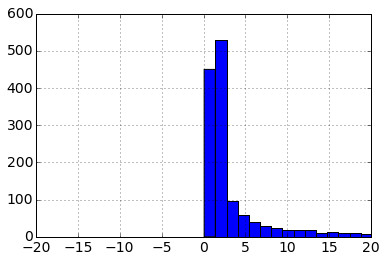

In [60]:
df['lgc_diff_2p'].hist(bins=20)
plt.xlim(-20, 20)


In [61]:
df['lgc_diff_2p'].describe()

count    1434.000000
mean        4.504766
std         6.612538
min         0.064892
25%         1.303565
50%         1.676129
75%         4.116197
max        26.795919
Name: lgc_diff_2p, dtype: float64

In [62]:
#df['lgc_diff_sm'].hist(bins=20)
#plt.xlim(-200, 200)

In [63]:
df['h_2p'].describe()

count    1434.000000
mean      286.067305
std       120.500119
min        89.017760
25%       233.086441
50%       261.618323
75%       350.952697
max       555.114624
Name: h_2p, dtype: float64

In [64]:
#df['lgc_diff_cm'].hist(bins=20)
#plt.xlim(-200, 200)

In [65]:
#df['lgc_diff_cm'].describe()

(-0.2, 0.2)

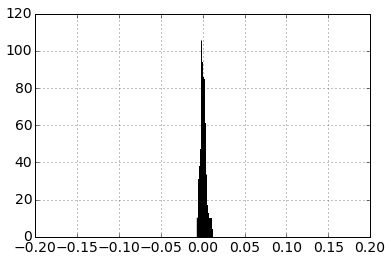

In [66]:
df['nr_diff_2p'].hist(bins=40)
plt.xlim(-0.2, 0.2)

In [67]:
df['nr_diff_2p'].describe()

count    1.434000e+03
mean    -2.401767e-15
std      3.211500e-03
min     -6.411404e-03
25%     -2.047434e-03
50%     -3.528029e-04
75%      1.746011e-03
max      1.132540e-02
Name: nr_diff_2p, dtype: float64

In [68]:
home_dir = os.getenv('HOME')
df.to_csv(os.path.join(home_dir,'Desktop/data.csv'))

In [69]:
df['nr_2p'].describe()

count    1434.000000
mean        0.949674
std         0.030045
min         0.902918
25%         0.923364
50%         0.948933
75%         0.971517
max         1.004743
Name: nr_2p, dtype: float64

In [70]:
df['phase'].describe()

count    1434.000000
mean        2.460948
std         0.703055
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: phase, dtype: float64